# [2018 Data Science Bowl - kaggle competiton.](https://www.kaggle.com/c/data-science-bowl-2018#description)

## 1.Introduction
  Imagine speeding up research for almost every disease, from lung cancer and heart disease to rare disorders. The 2018 Data Science Bowl offers our most ambitious mission yet: create an algorithm to automate nucleus detection.

We’ve all seen people suffer from diseases like cancer, heart disease, chronic obstructive pulmonary disease, Alzheimer’s, and diabetes. Many have seen their loved ones pass away. Think how many lives would be transformed if cures came faster.

By automating nucleus detection, you could help unlock cures faster—from rare disorders to the common cold. 

#### What will participants do?

Teams will create a computer model that can identify a range of nuclei 
across varied conditions. By observing patterns, asking questions, and building a model, participants will have a chance to push state-of-the-art technology farther.

By participating, teams will work to automate the process of identifying nuclei, which will allow for more efficient drug testing, shortening the 10 years it takes for each new drug to come to market. [Check out this video overview to find out more.](https://datasciencebowl.com/2018dsbtutorial/)


Our problem is highly connected with computer vision.
We divide our work for 4 parts:
 - Preprocessing image
 - Neural network
 - postprocessing
 - submission

## Preprocessing
In the preprocessing part of our pipeline we focused on standarize our images. We want them to have the same dimensions and we convert them to grayscale images. We resized all the images to 256x256x3, and we saved the original dimensions, becouse we need them to create the submision properly. 
## Neural network
- We used the [Unet network](https://arxiv.org/pdf/1505.04597.pdf) which is defined as Convolutional Networks for Biomedical Image Segmentation.

- We defined our scoring metric as intersect over union which is used for scoring in this competition. [Here is more how Interesct over union is defined](https://www.kaggle.com/c/data-science-bowl-2018#evaluation).

- We also need to deal with lack of data, so we used data augumentation techinque.

## Postprocessing

- We need to resize the output masks for the orginal size to create the submission.
- We focused also on splitting the nuclei masks, becouse of the really big impact on the final score. We used some methods from users notebooks on kaggle forum which are using cv2 library to split thoes masks. 

## Submission

- In this stage we needed to save our output masks as Run Length Encoding.
[Here is information how to do this](https://www.kaggle.com/c/data-science-bowl-2018#evaluation).


# Let's show our work result and summary the score.

First we load our model from stage one of competition and predict masks for stage one test set.

In [11]:
from skimage.measure import regionprops
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from skimage.morphology import label
import numpy as np
import os
import data as d
import model as m
import cv2
import pandas as pd
import postprocessing


path_list_test=d.getImagesPath('test')
X_test,sizes_test=d.PreprocessData(path_list_test,False)
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[m.mean_iou])
preds_test = loaded_model.predict(X_test, verbose=1)

65/65 [==============================] - 4s 68ms/step


Convert masks from probability to 1 or 0.

In [12]:
preds_test_t = (preds_test > 0.5).astype(np.uint8)

Now let's split the masks.

In [14]:
test_connected_components=[postprocessing.process(img)  for img in preds_test_t]
test_connected_components_split=[postprocessing.split_and_relabel(img)  for img in test_connected_components]
preds_test_upsampled =d.resizeTest(path_list_test,test_connected_components,sizes_test)

/Users/kamilpokora/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/kamilpokora/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


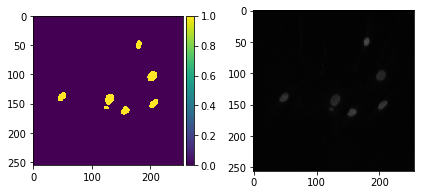

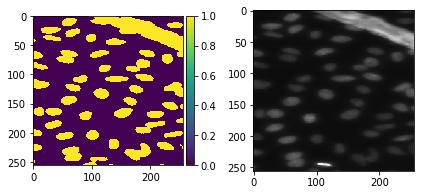

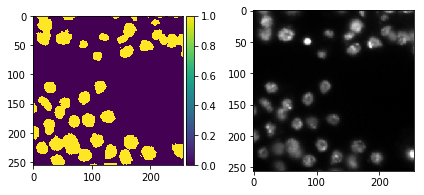

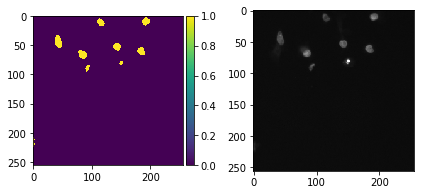

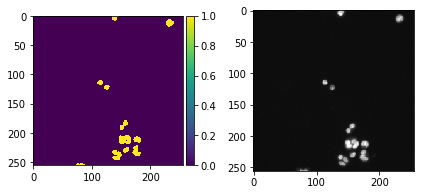

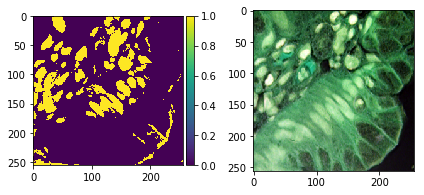

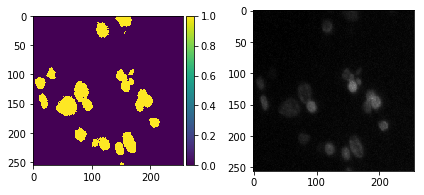

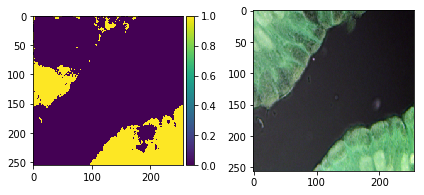

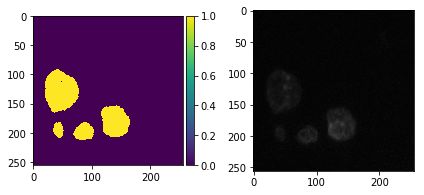

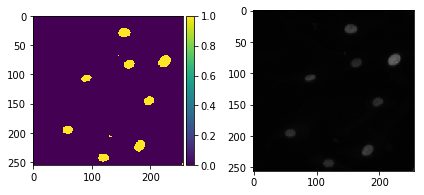

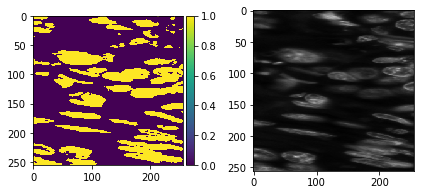

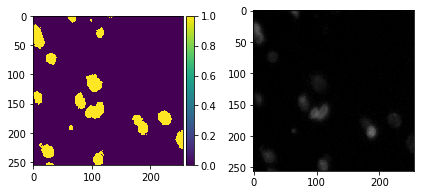

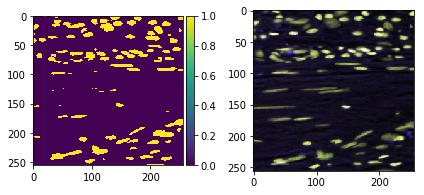

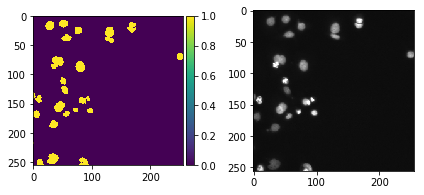

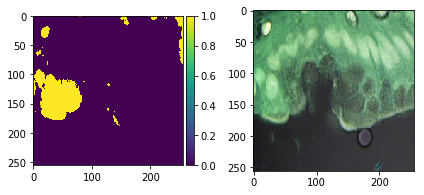

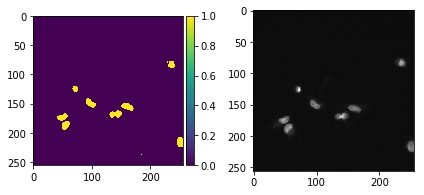

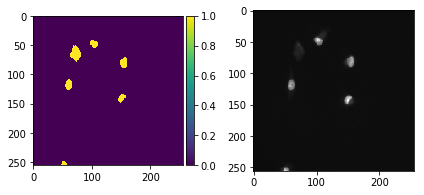

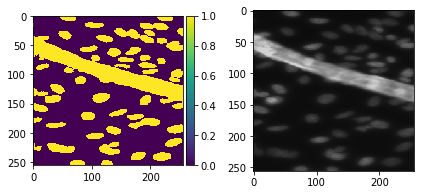

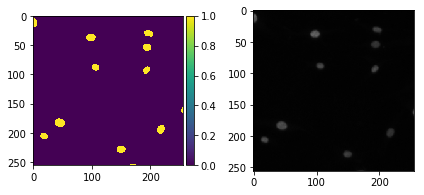

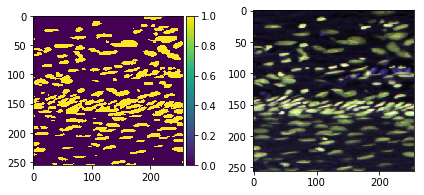

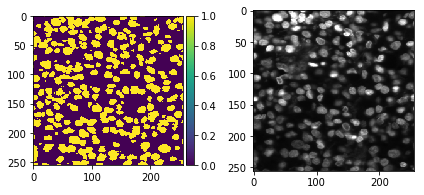

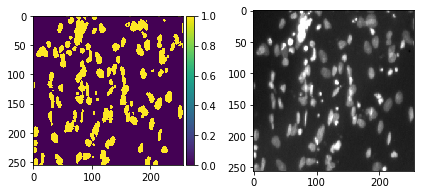

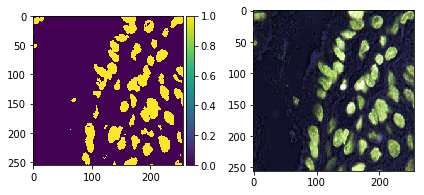

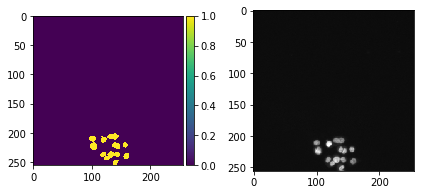

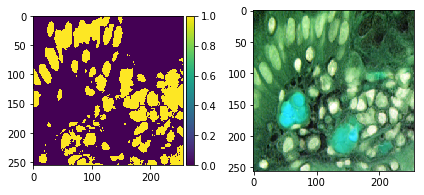

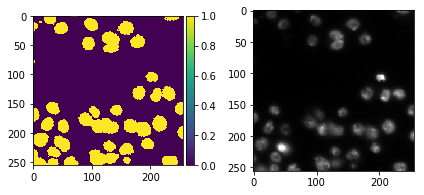

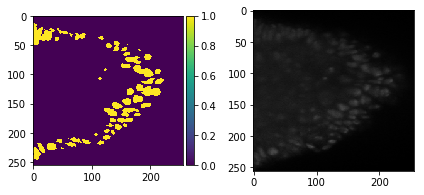

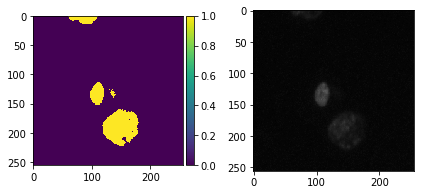

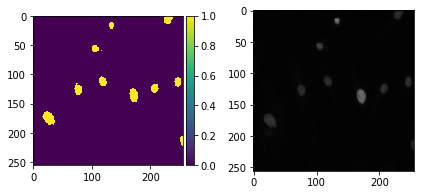

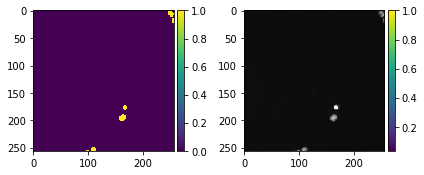

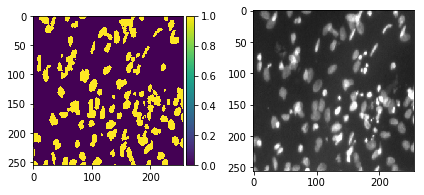

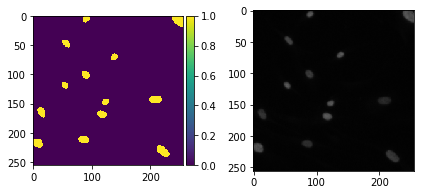

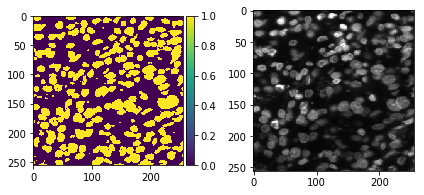

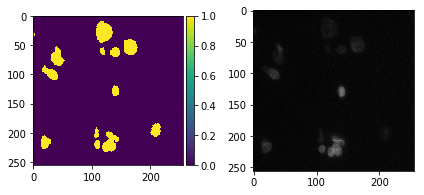

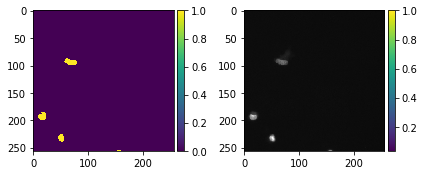

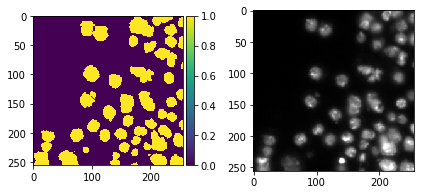

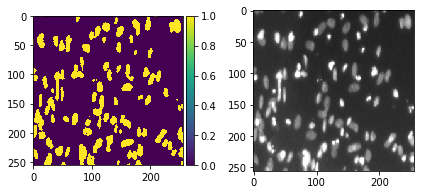

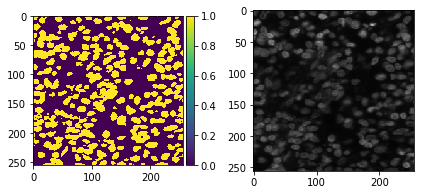

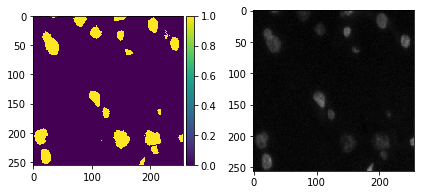

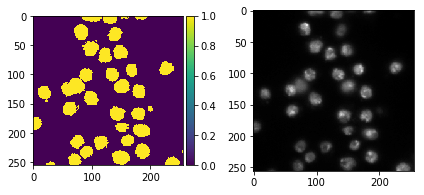

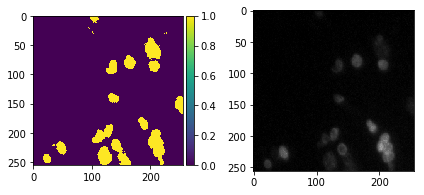

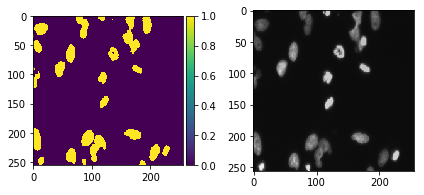

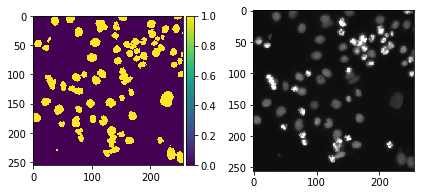

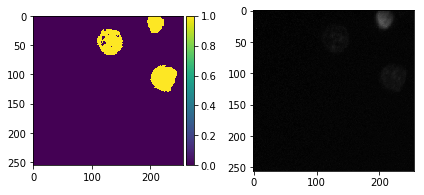

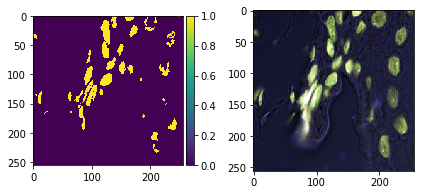

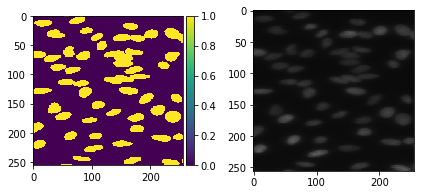

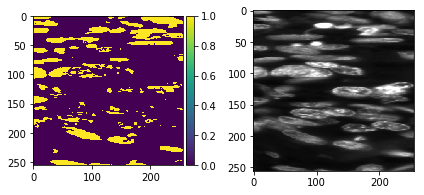

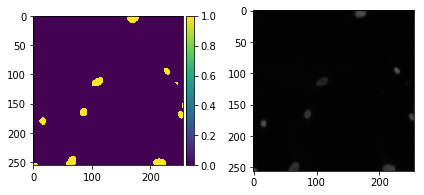

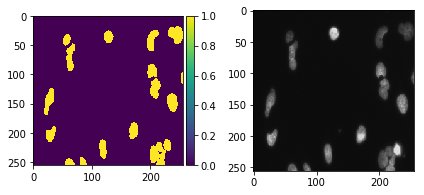

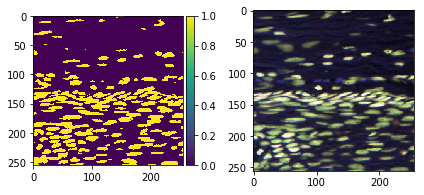

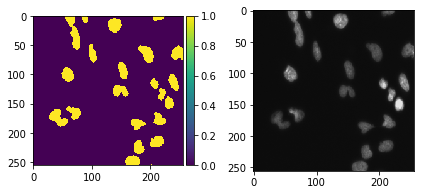

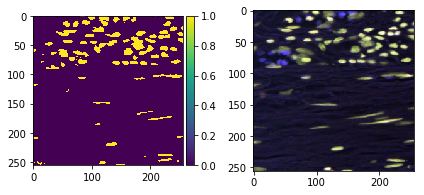

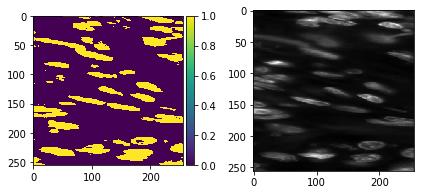

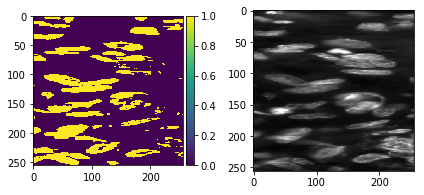

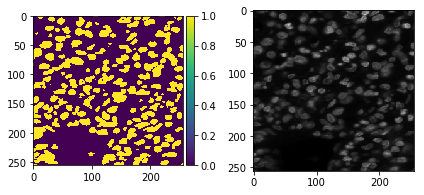

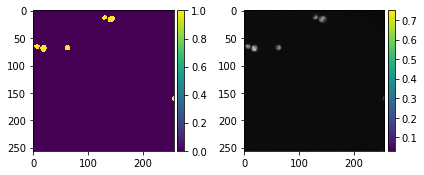

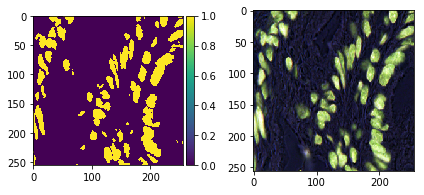

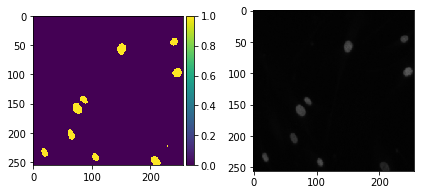

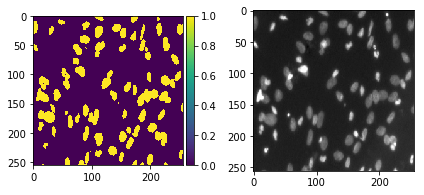

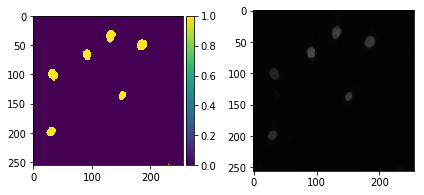

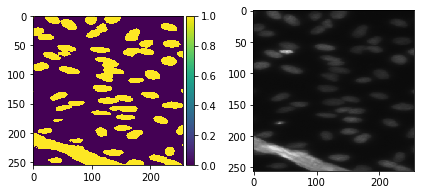

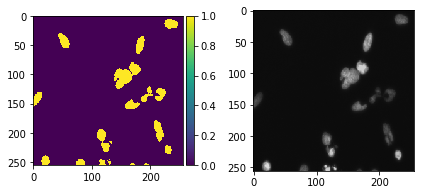

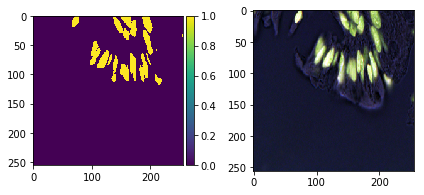

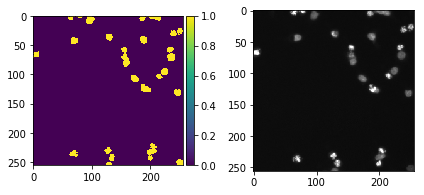

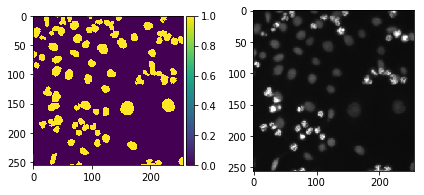

In [16]:
d.plotResult(preds_test_t, X_test)

# Score summary
We get 499 position out of 3634 which place us in top 14% teams. I thinks it is quite good if we take for consideretion fact that this was our first  meeting with computer vision.

We've got IOU score of 0.357 where winners team got 0.631, so there was a few aspects where we should perform better.

In my opinion we should focus more on preprocessing. We should cluster the images and make special preprocessing for each cluster. I think we would also try more kind of neural networks(maskRCNNs perform really well in this competition). We should also implement custom data augumentetion function which will be matched specifically to our problem. 

Lesson learned, we will perform better in next competition!